## Team1
- 1. 지역 날짜 날 시 최고 최저 기온
- 2. 최고기온이 가장 높은
- 3. 일교차가 가장 큰 지역 날자 날씨 일교차
- 4. 서울지역 12월 22일 마지막 다음 3일의 최고 최저기온 예측:

In [1]:
import os
import time
import matplotlib.pyplot as plt
import requests
import xmltodict

import pandas as pd

from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore')

### Data parsing

In [2]:
url="http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109"
response = requests.get(url)
time.sleep(3)
data_json=xmltodict.parse(response.text)

In [3]:
data_json

{'rss': {'@version': '2.0',
  'channel': {'title': '기상청 육상 중기예보',
   'link': 'http://www.kma.go.kr/weather/forecast/mid-term_02.jsp',
   'description': '기상청 날씨 웹서비스',
   'language': 'ko',
   'generator': '기상청',
   'pubDate': '2022년 12월 12일 (월)요일 06:00',
   'item': {'author': '기상청',
    'category': '육상중기예보',
    'title': '서울,경기도 육상 중기예보 - 2022년 12월 12일 (월)요일 06:00 발표',
    'link': 'http://www.kma.go.kr/weather/forecast/mid-term_02.jsp',
    'guid': 'http://www.kma.go.kr/weather/forecast/mid-term_02.jsp',
    'description': {'header': {'title': '서울,경기도 육상중기예보',
      'tm': '202212120600',
      'wf': '○ (강수) 15일(목)은 눈이 오는 곳이 있겠습니다.<br />○ (기온) 15일(목)~19일(월) 아침 기온은 -15~-5도, 낮 기온은 -4~4도로 평년(최저기온 -9~-3도, 최고기온 2~4도)보다 낮아 춥겠습니다. <br />          20일(화)~22일(목) 아침 기온은 -8~-2도, 낮 기온은 2~6도로 평년과 비슷하거나 조금 높겠습니다. <br />○ (해상) 서해중부해상의 물결은 17일(토)~18일(일)은 1.0~4.0m로 매우 높게 일겠고, 그 밖의 날은 1.0~2.5m로 일겠습니다.<br />○ (주말전망) 17일(토)과 18일(일)은 대체로 맑겠습니다. 아침 기온은 -15~-8도, 낮 기온은 -4~-2도가 되겠습니다.<br /><br />* 서해중부해상에는 17일(토

In [4]:
main=data_json['rss']['channel']['item']['description']['body']['location']

In [5]:
tot_list = list()
for j in range(len(main)):
    my_list = list()
    for i in range(len(main[j]['data'])):
        my_list.append(pd.DataFrame(main[j]['data'][i],index=[i]))
    temp=pd.concat(my_list)
    temp['city'] = main[j]['city']
    tot_list.append(temp)

In [6]:
main=pd.concat(tot_list)

- 1. 지역 날짜 날 시 최고 최저 기온

In [7]:
df_location_temp_min = pd.DataFrame(main.groupby('city')['tmn'].min())
df_location_temp_max = pd.DataFrame(main.groupby('city')['tmn'].max())

- 2. 최고기온이 가장 높은 곳

In [8]:
main[main['tmx']==main['tmx'].max()].head(1)

,mode,tmEf,wf,tmn,tmx,reliability,rnSt,city
10,A01,2022-12-20 00:00,맑음,-4,6,None,20,평택


In [9]:
main['tmx']=main['tmx'].apply(lambda x: int(x))
main['tmn']=main['tmn'].apply(lambda x: int(x))

In [10]:
main[main['tmx'] == main['tmx'].max()].head(1)

,mode,tmEf,wf,tmn,tmx,reliability,rnSt,city
10,A01,2022-12-20 00:00,맑음,-4,6,None,20,평택


In [11]:
main[main['tmx'] == main['tmx'].min()].head(1)

,mode,tmEf,wf,tmn,tmx,reliability,rnSt,city
6,A02,2022-12-18 00:00,맑음,-13,-5,None,10,김포


- 3. 일교차가 가장 큰 지역 날짜 날씨 일교차

In [12]:
main['diff'] = main['tmx'] - main['tmn']
main.sort_values('diff',ascending=False).head(1)

,mode,tmEf,wf,tmn,tmx,reliability,rnSt,city,diff
10,A01,2022-12-20 00:00,맑음,-9,5,None,20,가평,14


- 4. 서울지역 12월 22일 마지막 다음 3일의 최고 최저기온 예측:

In [13]:
main.set_index('tmEf',inplace=True)
main.index = pd.to_datetime(main.index, format='%Y-%m-%d %H:%M')

In [14]:
main_seoul=main[main['city'] == '서울']

In [15]:
y_1=main_seoul['tmn']
y_2=main_seoul['tmx']

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_1)
print('adf => 적을수록 귀무가설을 기각시킬 확률이 높다')
print(round(result[0],3))
print('=='*50)
print('p_value 0.05 이하면 귀무가설 기각')
print(round(result[1],3))

adf => 적을수록 귀무가설을 기각시킬 확률이 높다
-0.101
p_value 0.05 이하면 귀무가설 기각
0.949


In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y_2)
print('adf => 적을수록 귀무가설을 기각시킬 확률이 높다')
print(round(result[0],3))
print('=='*50)
print('p_value 0.05 이하면 귀무가설 기각')
print(round(result[1],3))

adf => 적을수록 귀무가설을 기각시킬 확률이 높다
-1.985
p_value 0.05 이하면 귀무가설 기각
0.293


In [18]:
from statsmodels.tsa.arima.model import ARIMA
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_list = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [19]:
arima_aic_check(y_1,(3,3,3)).head(1)

/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model

,order,AIC
3,p:0 d:1 q:0,47.443491


In [20]:
arima_aic_check(y_2,(3,3,3)).head(1)

/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model

,order,AIC
26,p:2 d:2 q:2,48.744708


In [21]:
model=ARIMA(y_1,order=(0,1,0))
rfit_y_1=model.fit()

/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
y_1.reset_index(drop=True)

0     -7
1     -7
2     -9
3     -9
4     -8
5     -8
6    -10
7    -10
8     -7
9     -7
10    -4
11    -2
12    -2
Name: tmn, dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


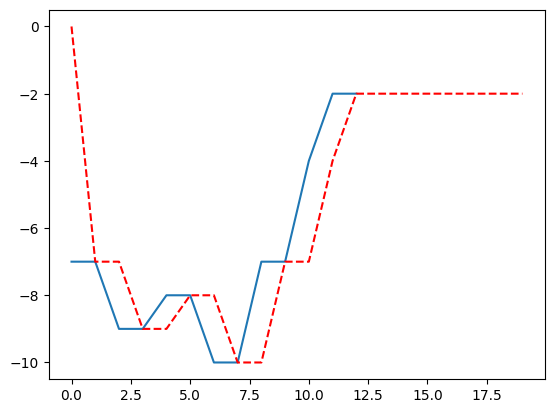

In [23]:
plt.plot(y_1.reset_index(drop=True))
plt.plot(rfit_y_1.predict(0,len(y_2)+6),'--r')

In [24]:
model=ARIMA(y_2,order=(2,2,2))
rfit_y_2=model.fit()

/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


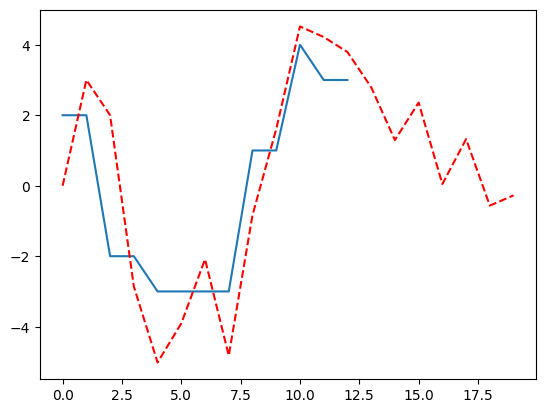

In [25]:
plt.plot(y_2.reset_index(drop=True))
plt.plot(rfit_y_2.predict(0,len(y_2)+6),'--r')